# Titanic: Machine Learning from Disaster

 <https://www.kaggle.com/c/titanic>

In [105]:
import sklearn
import pandas as pd
import numpy as np

In [106]:
% matplotlib inline

In [107]:
from matplotlib import pyplot as plt

In [108]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
Xtrain = train.drop(['PassengerId', 'Survived', 'Cabin', 'Ticket'], axis=1)
Xtest = test.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
Xtrain['is_test'] = False
Xtest['is_test'] = True
X = pd.concat([Xtrain, Xtest], axis=0)
X.index = range(len(X))
X.columns = X.columns.str.lower()

In [112]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
is_test       0
dtype: int64

# Работаем с данными

In [113]:
X = pd.get_dummies(X, columns=['sex', 'pclass', 'embarked'])

In [114]:
X.head()

,name,age,sibsp,parch,fare,is_test,sex_female,sex_male,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,0,1,0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,1,0,1,0,0,1,0,0
2,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,1,0,0,0,1,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,1,0,1,0,0,0,0,1
4,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,0,1,0,0,1,0,0,1


In [115]:
X['family']=X['sibsp']+X['parch']

In [116]:
X['alone']=np.where (X['family']==0,1,0)

In [117]:
X.family.value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family, dtype: int64

In [118]:
X['kid']=np.where (X['age']<16,1,0)

In [119]:
X['with_sibling_spouse']=np.where(X['sibsp']>0,1,0)
X['with_parent_or_child']=np.where(X['parch']>0,1,0)

In [120]:
X['female_with_spouse']=X['sex_female']*X['with_sibling_spouse']
X['male_with_spouse']=X['sex_male']*X['with_sibling_spouse']

In [121]:
X['female_class1']=X['sex_female']*X['pclass_1']
X['female_class2']=X['sex_female']*X['pclass_2']
X['female_class3']=X['sex_female']*X['pclass_3']

X['male_class1']=X['sex_male']*X['pclass_1']
X['male_class2']=X['sex_male']*X['pclass_2']
X['male_class3']=X['sex_male']*X['pclass_3']

In [122]:
X['big_family']=np.where(X['family']>3,1,0)

In [123]:
X['kid_big_family']=X['kid']*X['big_family']
X['female_big_family']=X['sex_female']*X['big_family']
X['male_big_family']=X['sex_male']*X['big_family']

In [124]:
X['kid_with_parents']= X['kid']* X['with_parent_or_child']

In [125]:
X.columns

Index(['name', 'age', 'sibsp', 'parch', 'fare', 'is_test', 'sex_female',
       'sex_male', 'pclass_1', 'pclass_2', 'pclass_3', 'embarked_C',
       'embarked_Q', 'embarked_S', 'family', 'alone', 'kid',
       'with_sibling_spouse', 'with_parent_or_child', 'female_with_spouse',
       'male_with_spouse', 'female_class1', 'female_class2', 'female_class3',
       'male_class1', 'male_class2', 'male_class3', 'big_family',
       'kid_big_family', 'female_big_family', 'male_big_family',
       'kid_with_parents'],
      dtype='object')

In [126]:
X=X.drop(['name','sibsp', 'parch'], axis=1)


In [127]:
X['age'].fillna(X['age'].mean(), inplace=True)
X['fare'].fillna(X['fare'].mean(), inplace=True)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X['age'])

/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [130]:
X['fare']=scaler.fit_transform(X['fare'])

/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/anna/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [131]:
X.head()

,age,fare,is_test,sex_female,sex_male,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,...,female_class2,female_class3,male_class1,male_class2,male_class3,big_family,kid_big_family,female_big_family,male_big_family,kid_with_parents
0,-0.611972,-0.503595,False,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.630431,0.734503,False,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.301371,-0.490544,False,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.397481,0.382925,False,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.397481,-0.488127,False,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [132]:
X.isnull().sum()

age                     0
fare                    0
is_test                 0
sex_female              0
sex_male                0
pclass_1                0
pclass_2                0
pclass_3                0
embarked_C              0
embarked_Q              0
embarked_S              0
family                  0
alone                   0
kid                     0
with_sibling_spouse     0
with_parent_or_child    0
female_with_spouse      0
male_with_spouse        0
female_class1           0
female_class2           0
female_class3           0
male_class1             0
male_class2             0
male_class3             0
big_family              0
kid_big_family          0
female_big_family       0
male_big_family         0
kid_with_parents        0
dtype: int64

In [133]:
y=train.Survived

In [134]:
X_cut=X[X['is_test']==0]
X_cut=X_cut.drop(['is_test'],axis=1)

In [135]:
X_test=X[X['is_test']==1]
X_test=X_test.drop(['is_test'],axis=1)

In [136]:
len(X_cut)

891

# Desicion Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [138]:
clf.fit(X_cut, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [139]:
import graphviz

In [140]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [141]:
train["result_labels"] =np.where (train["Survived"]==0,"dead","survived")

In [142]:
dot_data = get_tree_dot_view(clf, feature_names=list(X_cut.columns), class_names=train["result_labels"])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="sex_male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = dead", fillcolor="#e5813960"] ;
1 [label="female_class3 <= 0.5\ngini = 0.3828\nsamples = 314\nvalue = [81, 233]\nclass = survived", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="age <= -2.1262\ngini = 0.1003\nsamples = 170\nvalue = [9, 161]\nclass = survived", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = dead", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0907\nsamples = 168\nvalue = [8, 160]\nclass = survived", fillcolor="#399de5f2"] ;
2 -> 4 ;
5 [label="family <= 3.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = dead", fillcolor="#e5813900"] ;
1 -> 5 ;
6 [label="gini = 0.4839\nsamples = 117\nvalue = [48, 69]\nclass = survived", fillcolor="#399de54e"] ;
5 -> 6 ;
7 [label="gini = 0.1975\nsamples = 27\nvalue = [24, 3]\nclass = 

<http://www.webgraphviz.com/>

In [143]:
!pip install pydotplus

In [144]:
import pydotplus
from IPython.display import Image 

In [145]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

TypeError: object of type 'NoneType' has no len()

## Kross-Validation

In [146]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [147]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

scores = cross_val_score(clf_best,
                         X_cut, y, groups=None,
                         scoring = 'accuracy',
                         cv = kfold)

In [148]:
print (scores)
print (np.average(scores))

[ 0.85555556  0.85393258  0.80898876  0.88764045  0.85393258  0.79775281
  0.78651685  0.86516854  0.85393258  0.76404494]
0.832746566792


# Гиперпараметры

In [149]:
# GridSearch
from sklearn.model_selection import GridSearchCV
# 
#   GridSearchCV(estimator, param_grid, scoring=None, fit_params=None,
#                n_jobs=1, iid=True, refit=True, cv=None, verbose=0, 
#                pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True) 

In [150]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [151]:
? DecisionTreeClassifier

In [152]:
param_grid = [
  {'max_depth': [1,3,5,7,9,11], 
  'criterion' : ['gini', 'entropy'],
  'splitter' : ['best', 'random'],
  'min_samples_split' : [2,3,4,5,6,7,8,9,10]}]


grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, 
                    scoring='accuracy',
                    cv=kfold)

In [153]:
tree_grid_search = grid_tree.fit(X_cut, y)

In [154]:
tree_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 6,
 'splitter': 'best'}

In [155]:
clf_best = DecisionTreeClassifier(criterion='gini',
 max_depth= 7,
 min_samples_split= 6,
 splitter = 'best',
random_state=123)

In [156]:
clf_best.fit(X_cut, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

([<matplotlib.axis.YTick at 0x7f7464b41240>,
 <a list of 28 Text yticklabel objects>)

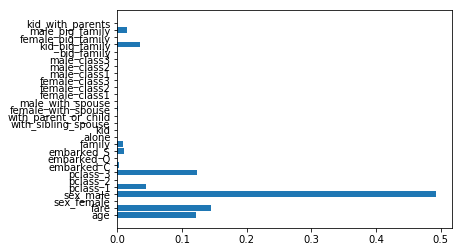

In [157]:
plt.barh(np.arange(len(clf_best.feature_importances_)), clf_best.feature_importances_)
plt.yticks(np.arange(len(X_cut.columns)),X_cut.columns)

In [158]:
dot_data = get_tree_dot_view(clf_best, feature_names=list(X_cut.columns), class_names=train["result_labels"])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="sex_male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = dead", fillcolor="#e5813960"] ;
1 [label="pclass_3 <= 0.5\ngini = 0.3828\nsamples = 314\nvalue = [81, 233]\nclass = survived", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="age <= -2.1262\ngini = 0.1003\nsamples = 170\nvalue = [9, 161]\nclass = survived", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = dead", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="fare <= -0.0858\ngini = 0.0907\nsamples = 168\nvalue = [8, 160]\nclass = survived", fillcolor="#399de5f2"] ;
2 -> 4 ;
5 [label="fare <= -0.0979\ngini = 0.1823\nsamples = 69\nvalue = [7, 62]\nclass = survived", fillcolor="#399de5e2"] ;
4 -> 5 ;
6 [label="age <= 2.0281\ngini = 0.1609\nsamples = 68\nvalue = [6, 62]\nclass = survived", fillcolor="#399de5e6"] ;
5 -> 6 ;
7 [label="female_with_spouse <= 

## Submission

In [161]:
predicted = clf_best.predict(X_test)

In [162]:
with open('submission.csv', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, prediction in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, prediction))

In [159]:
scores = cross_val_score(clf_best,
                         X_cut, y, groups=None,
                         scoring = 'accuracy',
                         cv = kfold)

In [160]:
print (scores)
print (np.average(scores))

[ 0.85555556  0.85393258  0.80898876  0.88764045  0.85393258  0.79775281
  0.78651685  0.86516854  0.85393258  0.76404494]
0.832746566792
